# Neural Networks Project
#### Using ANN and CNN to automatically detect handwritten digits

In this project we plan to solve one of the most famous problems in machine learning - detection of handwritten digits.

For this, we'll use two different approaches. 

The first one will be using ANN. ANN are a branch of machine learning models that are built on a collection of connected nodes called artifical neurons, which model the neurons in a biological brain.



In [20]:
import os # responsible 
import cv2 # load images and process them
import numpy as np # numpy arrays for further use with tensorflow
import matplotlib.pyplot as plt # for data visualization
import tensorflow as tf # machine learning models

### Dataset

The dataset chosen was MNIST from TensorFlow datasets.

MNIST is a large database of handwritten digits, that is commonly used for training image processing systems.


##### Loading the Data

In [21]:
mnist= tf.keras.datasets.mnist
data = mnist.load_data()

##### Train-Test Split

In [22]:
(x_train, y_train), (x_test, y_test)  = data

#scaling it so all values are between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### ANN

##### Building the ANN

In [23]:

class AnnNeuralNetwork():
    def __init__(self):
        self.layers = [
            tf.keras.layers.Flatten(input_shape=(28,28)), #flatten layer to flatten 28x28 pixels to 1x784 pixels
            tf.keras.layers.Dense(128, activation=tf.nn.relu), # fully-connected layer, 128 units, relu activation function
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer, 10 units because we have 10 digits, softmax activation function
        ]
        self.model = tf.keras.models.Sequential(self.layers)
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, epochs=3):
        self.model.fit(x_train, y_train, epochs=epochs)
    
    def evaluate(self, x_test, y_test):
        val_loss, val_acc = self.model.evaluate(x_test, y_test)
        return val_loss, val_acc
    def save(self, path):
        self.model.save(path)
    def predict(self, x):
        return self.model.predict(x)

##### Fitting the model

In [24]:
ann = AnnNeuralNetwork()
ann.train(x_train, y_train)
val_loss, val_acc = ann.evaluate(x_test, y_test)
print(val_loss, val_acc)

ann.save('ann_num_reader.model')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2629 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1063 - accuracy: 0.9669
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9707
0.0959620550274849 0.9707000255584717
INFO:tensorflow:Assets written to: ann_num_reader.model/assets


INFO:tensorflow:Assets written to: ann_num_reader.model/assets


313/313 [==============================] - 1s 2ms/step
7


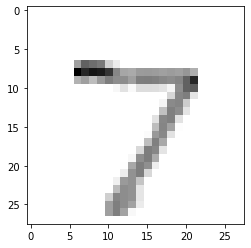

In [25]:
predictions = ann.predict([x_test]) # make predictions
print(np.argmax(predictions[0])) # print the first prediction
plt.imshow(x_test[0], cmap=plt.cm.binary) # show the first image
plt.show() # show the image

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist